<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/or_indeed_08_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

https://www.oregon.gov/boli/workers/Pages/minimum-wage-schedule.aspx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgcL54xOTziSt3ulE7SBgqUOn0wV0OdUqt51j1r6GMnccIoLcj_Rfk


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_or_08_03_21.txt", sep='\t')
df.shape

(22312, 47)

In [ ]:
#pandas!
pd.set_option('display.max_rows', 500) 

#dates!
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index(pd.DatetimeIndex(df['review_date']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22312 entries, 0 to 22311
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   platform              22312 non-null  object        
 1   scrape_company_num    22312 non-null  int64         
 2   date_scraped          22312 non-null  object        
 3   scrape_folder_name    22312 non-null  object        
 4   scrape_file_name      22312 non-null  object        
 5   base_url              22312 non-null  object        
 6   page_num              22312 non-null  int64         
 7   parent_company        22312 non-null  object        
 8   be_careful            22312 non-null  int64         
 9   company_name          22312 non-null  object        
 10  scraped_from_url      22312 non-null  object        
 11  empid                 22312 non-null  object        
 12  language              0 non-null      float64       
 13  id              

Text(0.5, 1.0, 'Reviews in OR')

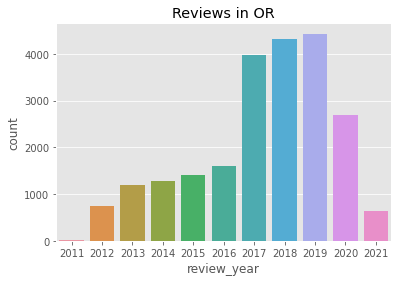

In [ ]:
sns.countplot(data=df, x='review_year')
plt.title("Reviews in OR")

In [ ]:

#df = df[df.be_careful!=1]

In [ ]:
# Cut off before 2012

df = df[df.review_year>2011]
#df = df[df.review_year=<2021]
#sns.countplot(data=df, x='review_year')
#plt.title("Reviews in OR")

In [ ]:
districts = ['Portland', 'Forest Grove', 'Cornelius', 'Hillsboro', 'Beaverton', 'Sherwood', 'King City', 'Tigard', 'Tualatin',
             'Wilsonville', 'Durham', 'River Grove', 'Lake Oswego', 'West Linn', 'Oregon City', 'Gladstone', 'Happy Valley',
             'Johnson City', 'Milwaukie', 'Gresham', 'Fairview', 'Wood Village', 'Troutdale', 'Maywood Park']

In [ ]:
#df[df.city=='Portland'].count()
df.count()

platform                22303
scrape_company_num      22303
date_scraped            22303
scrape_folder_name      22303
scrape_file_name        22303
base_url                22303
page_num                22303
parent_company          22303
be_careful              22303
company_name            22303
scraped_from_url        22303
empid                   22303
language                    0
id                      22303
review_url              22303
uid                     22303
review_date             22303
review_month            22303
review_day              22303
review_year             22303
parsable_loc            22303
state                   22303
city                    22303
country                 22303
location                22303
job_title               22301
norm_job_title          22201
current                 22303
length_of_employment        0
overall_rating          22303
work_life_rating        22303
compensation_rating     22303
job_security_rating     22303
management

In [ ]:
df['treat_loc'] = 0
df.loc[df.city.isin(districts),'treat_loc']= 1
df.treat_loc.sum()


10241

In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

Total number of reviews: 22303
Total reviews in Portland: 10241


([<matplotlib.axis.XTick at 0x7f26895bec90>,
 [Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020'),
  Text(0, 0, '2021')])

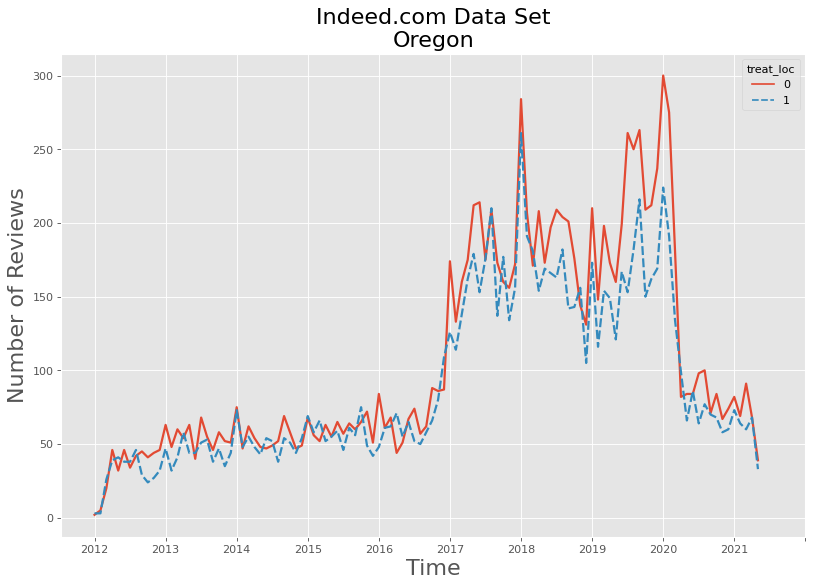

In [ ]:
# Cut off before 2013, after 2020
#df = df[df.review_year>2012]
#df = df[df.review_year<2021]
print('Total number of reviews:', df.shape[0])
print('Total reviews in Portland:', df.treat_loc.sum())

data_viz = df[['month_year', 'treat_loc']]
data_viz = data_viz.groupby(['month_year', 'treat_loc']).size().reset_index(name='count')
#data_viz = data_viz.groupby(['review_year', 'seattle']).agg({'count'})

#print(data_viz)

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Indeed.com Data Set\nOregon", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Birmingham: 33,858 reviews', 'Birmingham: 5,970 reviews'])


7502


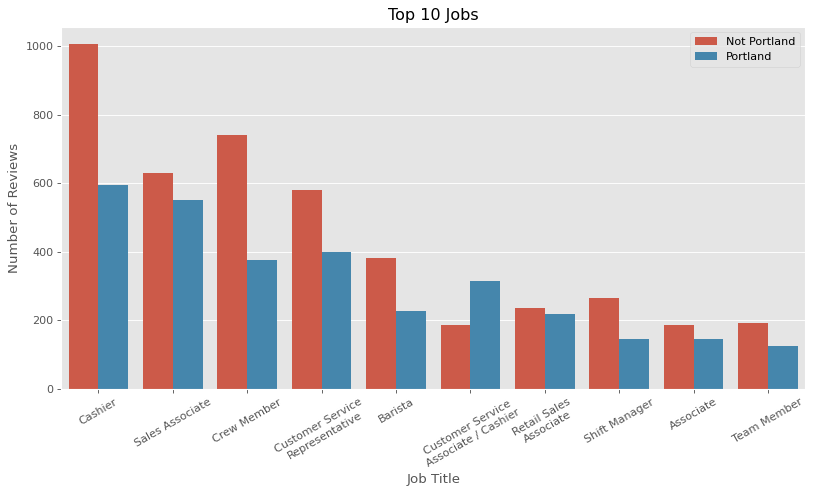

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_jobs = df.norm_job_title.value_counts()[:10].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'treat_loc', order = top_jobs)
plt.title("Top 10 Jobs")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
l= ['Cashier', 'Sales Associate', 'Crew Member', 'Customer Service\nRepresentative', 'Barista', 'Customer Service\nAssociate / Cashier', 'Retail Sales\nAssociate', 'Shift Manager', 'Associate', 'Team Member']
plt.xticks(ticks=locs, labels=l, rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Portland', 'Portland'])

7502


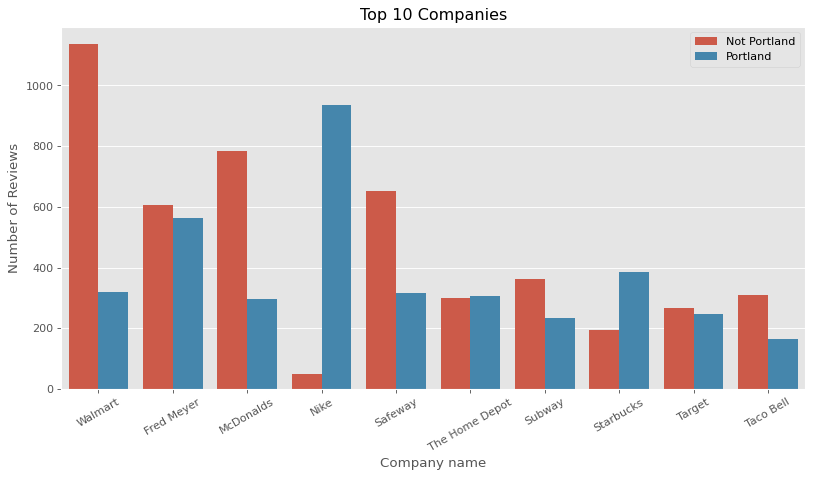

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_comp = df.company_name.value_counts()[:10].index.tolist()
comp_df = df[df.company_name.isin(top_comp)]
print(job_df.shape[0])
sns.countplot(data=comp_df, x='company_name', hue = 'treat_loc', order = top_comp)
plt.title("Top 10 Companies")
plt.xlabel('Company name')
locs, labs = plt.xticks()
plt.xticks(rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Portland', 'Portland'])

In [ ]:
comp = df.groupby(['month_year', 'treat_loc']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,treat_loc,mean,count
0,2012-01,0,4.500000,2
1,2012-01,1,3.666667,3
2,2012-02,0,3.000000,5
3,2012-02,1,3.666667,3
4,2012-03,0,3.350000,20
5,2012-03,1,3.346154,26
6,2012-04,0,3.413043,46
7,2012-04,1,3.794872,39
8,2012-05,0,3.718750,32
9,2012-05,1,3.560976,41


In [ ]:
df.review_date.min()

Timestamp('2012-01-11 00:00:00')

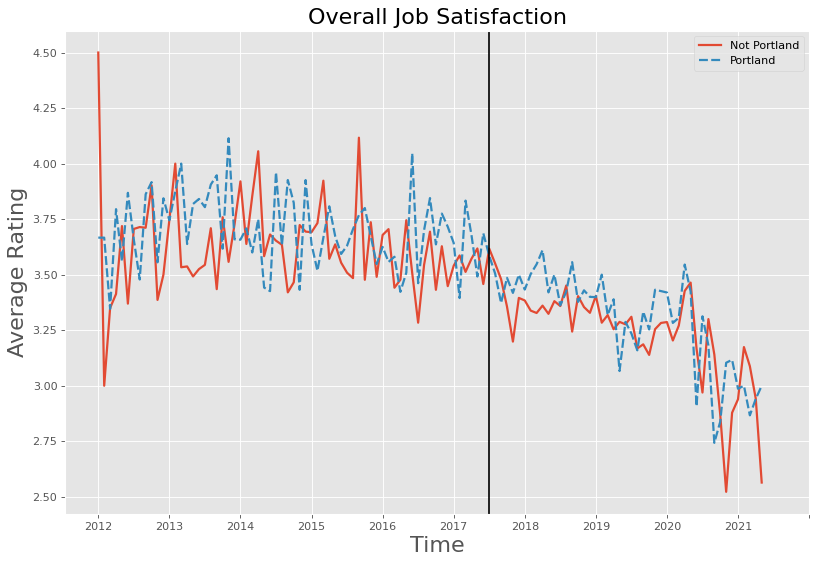

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Portland', 'Portland'])
plt.axvline(x=66, color = 'black')

In [ ]:
f = df[df.company_name.isin(['Amazon.com', 'Walmart', 'McDonalds', 'Starbucks'])]
domp = f.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)
domp

,month_year,company_name,mean,count
0,2012-03,McDonalds,3.333333,3
1,2012-03,Walmart,3.666667,3
2,2012-04,McDonalds,4.000000,6
3,2012-04,Starbucks,4.000000,2
4,2012-04,Walmart,2.750000,4
5,2012-05,McDonalds,3.333333,3
6,2012-05,Walmart,3.166667,6
7,2012-06,McDonalds,3.500000,6
8,2012-06,Walmart,2.833333,6
9,2012-07,McDonalds,3.666667,3


([<matplotlib.axis.XTick at 0x7f268aa49b50>,
 [Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020')])

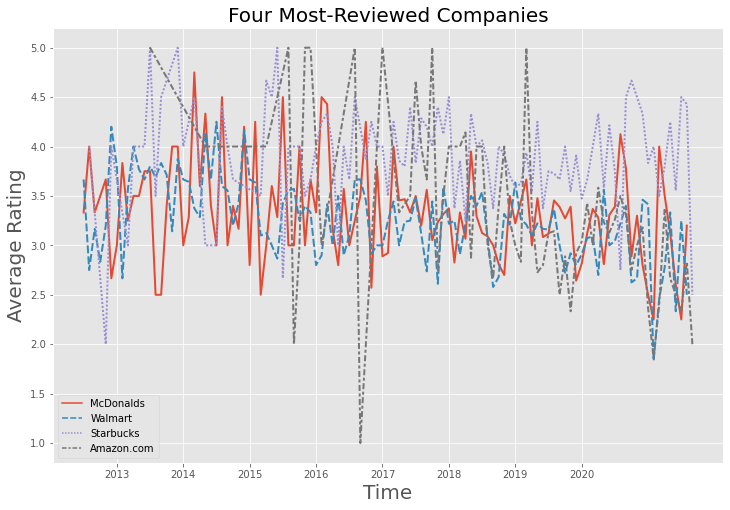

In [ ]:
### plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Four Most-Reviewed Companies", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')
#ticks, labels = plt.xticks()

plt.xticks(ticks=[6,18,30,42,54,66,78,90], labels=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
#plt.legend(['Not Seattle', 'Seattle'])

In [ ]:
df2 = df[df.compensation_rating!=0]
print(df2.shape[0])
comp = df2.groupby(['review_year', 'treat_loc']).agg({'compensation_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

20582


,review_year,treat_loc,mean,count
0,2012,0,3.228324,346
1,2012,1,3.257962,314
2,2013,0,3.163669,556
3,2013,1,3.381696,448
4,2014,0,3.241852,583
5,2014,1,3.246241,532
6,2015,0,3.110410,634
7,2015,1,3.218033,610
8,2016,0,3.088235,748
9,2016,1,3.266388,717


(2.8, 3.8)

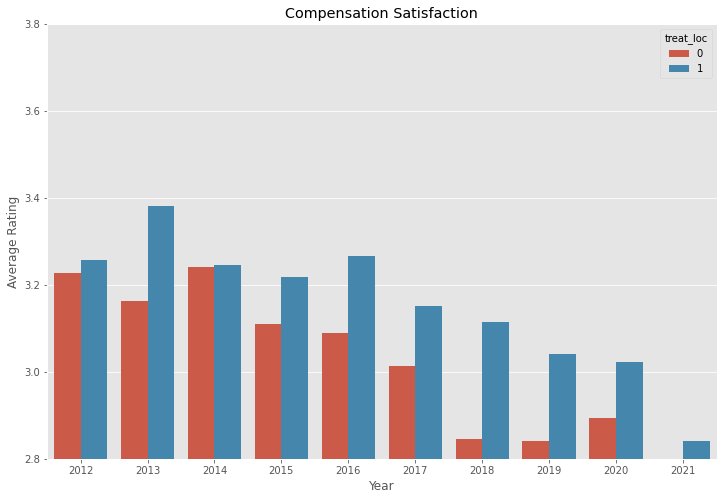

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=comp, x='review_year', y='mean', hue='treat_loc')


plt.title("Compensation Satisfaction")
plt.xlabel('Year')
plt.ylabel('Average Rating')
#plt.legend(['Not Seattle', 'Seattle'])
plt.ylim(2.8, 3.8)

In [ ]:
# create output for R
df['post'] = 0
mask = (df['review_date']>='07/01/2017')
df.post[mask]=1


df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/port_rdf.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
